2.6. Probability and Statistics

In [4]:
%matplotlib inline
import random
import torch
import numpy as np
from torch.distributions.multinomial import Multinomial

from matplotlib_inline import backend_inline
from matplotlib import pyplot as plt

In [5]:
def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')

In [6]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

In [7]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [49, 51]


In [8]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()

tensor([42., 58.])

In [9]:
Multinomial(100, fair_probs).sample() / 100

tensor([0.5100, 0.4900])

In [10]:
counts = Multinomial(10000, fair_probs).sample()
counts / 10000

tensor([0.5076, 0.4924])

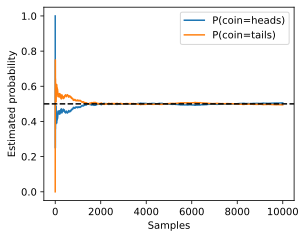

In [11]:
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

set_figsize((4.5, 3.5))
plt.plot(estimates[:, 0], label=("P(coin=heads)"))
plt.plot(estimates[:, 1], label=("P(coin=tails)"))
plt.axhline(y=0.5, color='black', linestyle='dashed')
plt.gca().set_xlabel('Samples')
plt.gca().set_ylabel('Estimated probability')
plt.legend()

2.6.8. Exercises

1. Give an example where observing more data can reduce the amount of uncertainty about the outcome to an arbitrarily low level.

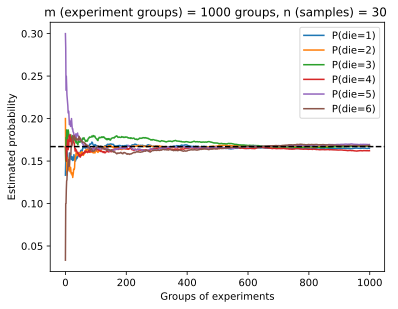

In [33]:
fair_probs_die = torch.tensor([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

def experiment_fig(n, m):
    counts = torch.from_numpy(np.random.multinomial(n, fair_probs_die, size=m))
    cum_counts = counts.type(torch.float32).cumsum(axis=0)
    estimates = cum_counts / cum_counts.sum(axis=1, keepdims=True)

    set_figsize((6, 4.5))
    for i in range(fair_probs_die.shape[0]):
        plt.plot(estimates[:, i].numpy(),
                    label=("P(die=" + str(i + 1) + ")"))
    plt.axhline(y=0.167, color='black', linestyle='dashed')
    plt.gca().set_xlabel('Groups of experiments')
    plt.gca().set_ylabel('Estimated probability')
    plt.title(f'm (experiment groups) = {m} groups, n (samples) = {n} ')
    plt.legend()
experiment_fig(30, 1000)

2. Give an example where observing more data will only reduce the amount of uncertainty up to a point and then no further. Explain why this is the case and where you expect this point to occur.

3. We empirically demonstrated convergence to the mean for the toss of a coin. Calculate the variance of the estimate of the probability that we see a head after drawing samples.

    1. How does the variance scale with the number of observations?

    2. Use Chebyshev’s inequality to bound the deviation from the expectation.

    3. How does it relate to the central limit theorem?

A:
1. The variance is equal to p*(1-p) / n. This means the variance scales with 1/n, where n is the number of observations.

2. Using Chebyshev’s inequality, we can bound $\hat{p}$ with $P\left(|\hat p - p| \ge k \cdot \sqrt{\frac{p(1-p)}{n}}\right) \le \frac{1}{k^2}$ (with p=0.5 in our case, assuming the coin is fair).

3. Chebyshev’s inequality gives us a distribution-free bound, but as n grows (typically for n > 30), the central limit theorem tells us that $\hat p \approx \mathcal{N} \left(p, \frac{p(1-p)}{n}\right)$

4. Assume that we draw $m$ samples $x_i$ from a probability distribution with zero mean and unit variance. Compute the averages
$z_m=m^{-1}\displaystyle\sum_{i=1}^mx_i$. Can we apply Chebyshev’s inequality for every $z_m$ independently? Why not?

5. Given two events with probability $P(A)$ and $P(B)$, compute upper and lower bounds on $P(A \cup B)$ and $P(A \cap B)$. Hint: graph the situation using a Venn diagram.

A: For $P(A \cup B)$, the lower bound is $max(P(A), P(B))$, and the upper bound is $max(1, P(A) + P(B))$. For $P(A \cap B)$, the lower bound is $max(0, P(A)+P(B)-1) $(remember that $P(A)+P(B)$ can be larger than 1) and the upper bound is $min(P(A), P(B))$

6. Assume that we have a sequence of random variables, say $A$, $B$, and $C$, where $B$ only depends on $A$, and $C$ only depends on $B$, can you simplify the joint probability $P(A,B,C)$? Hint: this is a Markov chain.

7. In Section 2.6.5, assume that the outcomes of the two tests are not independent. In particular assume that either test on its own has a false positive rate of 10% and a false negative rate of 1%. That is, assume that $P(D=1|H=0)=0.1$ and that $P(D=0|H=1)=0.1$. Moreover, assume that for $H=1$ (infected) the test outcomes are conditionally independent, i.e., that $P(D_1,D_2|H=1)=P(D_1|H=1)P(D_2|H=1)$ but that for healthy patients the outcomes are coupled via $P(D_1=D_2=1|H=0)=0.02$.

    1. Work out the joint probability table for $D_1$ and $D_2$, given $H=0$ based on the information you have so far.

    2. Derive the probability that the patient is diseased ($H=1$) after one test returns positive. You can assume the same baseline probability $P(H=1)=0.0015$ as before.

    3. Derive the probability that the patient is diseased ($H=1$) after both tests return positive.

8. Assume that you are an asset manager for an investment bank and you have a choice of stocks $s_i$ to invest in. Your portfolio needs to add up to 1 with weights $\alpha _i$ for each stock. The stocks have an average return $u=E_{s \sim P}[s]$ and covariance $\sum=Cov_{s \sim P}[s]$.

    1. Compute the expected return for a given portfolio $\alpha$.

    2. If you wanted to maximize the return of the portfolio, how should you choose your investment?

    3. Compute the variance of the portfolio.

    4. Formulate an optimization problem of maximizing the return while keeping the variance constrained to an upper bound. This is the Nobel-Prize winning Markovitz portfolio (Mangram, 2013). To solve it you will need a quadratic programming solver, something way beyond the scope of this book.